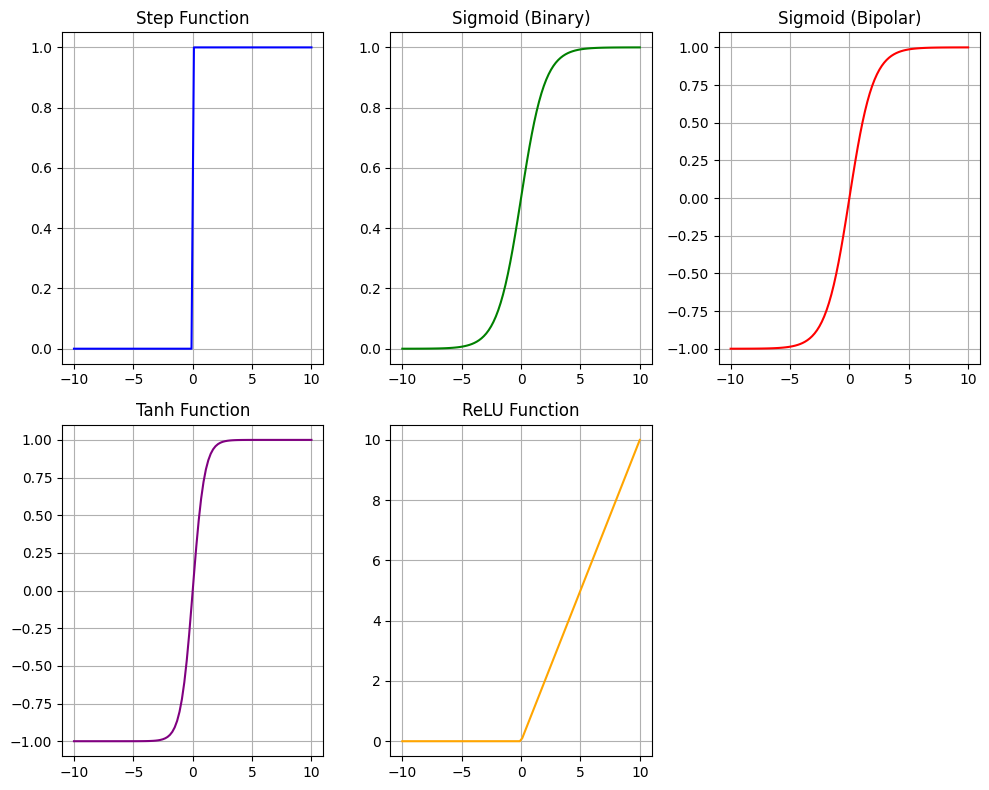

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implement Activation Functions

# Step Function:
# This function outputs 1 if the input is greater than or equal to 0, otherwise it outputs 0.
# It's commonly used in early neural networks but is rarely used now due to its limitations (non-differentiability).
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function (Binary):
# The binary sigmoid squashes any real-valued number into the range (0, 1).
# It is commonly used for binary classification tasks in neural networks.
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Function (Bipolar):
# The bipolar sigmoid maps the input into the range (-1, 1), useful for cases where outputs need to have a negative range.
# The formula is slightly modified from the binary sigmoid.
def sigmoid_bipolar(x):
    return 2 / (1 + np.exp(-x)) - 1

# Tanh Function:
# The tanh (hyperbolic tangent) function outputs values between -1 and 1.
# It's commonly used in neural networks, especially for hidden layers, as it centers the data around 0.
def tanh_function(x):
    return np.tanh(x)

# ReLU Function:
# The ReLU (Rectified Linear Unit) function returns the input if it's positive, otherwise returns 0.
# It's one of the most popular activation functions in modern neural networks because of its simplicity and efficiency.
def relu_function(x):
    return np.maximum(0, x)

# 2. Visualize Activation Functions

# Here, we generate 100 values of x between -10 and 10 to visualize the activation functions' behavior over this range.
x = np.linspace(-10, 10, 100)

# Setting up a figure for the plots, and defining the size of the figure.
plt.figure(figsize=(10, 8))

# Plot Step Function:
# Subplot 1: We plot the Step Function to observe how it changes the input.
plt.subplot(2, 3, 1)  # Subplot layout with 2 rows and 3 columns, this is the 1st plot.
plt.plot(x, step_function(x), label="Step Function", color='blue')  # Plot the step function using blue color.
plt.title("Step Function")  # Title for the plot.
plt.grid(True)  # Adding a grid for better readability of the graph.

# Plot Sigmoid (Binary):
# Subplot 2: We plot the Binary Sigmoid function and observe how it smoothly changes the input.
plt.subplot(2, 3, 2)  # This is the 2nd plot in the grid.
plt.plot(x, sigmoid_binary(x), label="Sigmoid (Binary)", color='green')  # Plot using green color.
plt.title("Sigmoid (Binary)")  # Title for the plot.
plt.grid(True)  # Adding grid lines for clarity.

# Plot Sigmoid (Bipolar):
# Subplot 3: We plot the Bipolar Sigmoid to see how its range differs from the binary version.
plt.subplot(2, 3, 3)  # This is the 3rd plot.
plt.plot(x, sigmoid_bipolar(x), label="Sigmoid (Bipolar)", color='red')  # Plot in red to distinguish from binary sigmoid.
plt.title("Sigmoid (Bipolar)")  # Title for the plot.
plt.grid(True)  # Grid lines for better visualization.

# Plot Tanh Function:
# Subplot 4: The Tanh function plot shows the smooth transition of values from -1 to 1.
plt.subplot(2, 3, 4)  # This is the 4th plot in the grid.
plt.plot(x, tanh_function(x), label="Tanh", color='purple')  # Plot in purple color.
plt.title("Tanh Function")  # Title for the plot.
plt.grid(True)  # Adding grid for clarity.

# Plot ReLU Function:
# Subplot 5: The ReLU function plot demonstrates how values are zero for negative inputs and remain linear for positive inputs.
plt.subplot(2, 3, 5)  # This is the 5th plot in the grid.
plt.plot(x, relu_function(x), label="ReLU", color='orange')  # Plot using orange color.
plt.title("ReLU Function")  # Title for the plot.
plt.grid(True)  # Adding grid lines for better understanding.

# Adjust layout to make sure plots do not overlap or get too close to each other.
plt.tight_layout()

# Finally, display all the plots.
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)  # Set seed for NumPy
tf.random.set_seed(42)  # Set seed for TensorFlow

# XOR Dataset:
# X contains the input values for the XOR problem. 
# y contains the corresponding outputs for the XOR truth table.
# XOR outputs 1 when the inputs are different and 0 when they are the same.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input values for XOR
y = np.array([0, 1, 1, 0])  # Output values for XOR

# Build neural network model:
# This function creates a simple neural network model with 1 hidden layer of 4 neurons.
# The activation_function argument allows us to test different activation functions for the hidden layer.
# The output layer has 1 neuron with a 'sigmoid' activation, suitable for binary classification tasks like XOR.
def create_model(activation_function):
    model = models.Sequential()  # Initializing a sequential model (layer-by-layer construction).
    model.add(layers.Dense(4, input_dim=2, activation=activation_function))  # Hidden layer with 4 neurons, custom activation.
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 neuron, using 'sigmoid' for binary classification.
    
    # Compiling the model with Adam optimizer, binary cross-entropy as the loss function (since it's binary classification),
    # and accuracy as the metric to evaluate performance during training.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model with different activation functions:
# We'll iterate through a list of different activation functions ('sigmoid', 'tanh', 'relu') to compare their performance.
activations = ['sigmoid', 'tanh', 'relu']
for activation in activations:
    print(f"\nTraining with {activation} activation:")
    
    # Create the model with the specified activation function for the hidden layer.
    model = create_model(activation)
    
    # Train the model for 100 epochs on the XOR dataset. We use verbose=0 to suppress the training output for simplicity.
    model.fit(X, y, epochs=100, verbose=0)
    
    # After training, we use the model to predict the outputs for the XOR inputs (X).
    # The model outputs probabilities, so we use (predictions > 0.5) to convert them into binary 0 or 1.
    predictions = (model.predict(X) > 0.5).astype("int32")
    
    # Calculate the accuracy by comparing the predicted outputs with the actual XOR outputs (y).
    accuracy = accuracy_score(y, predictions)
    
    # Print the accuracy for the current activation function.
    print(f"Accuracy with {activation}: {accuracy * 100:.2f}%")


Training with sigmoid activation:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy with sigmoid: 50.00%

Training with tanh activation:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy with tanh: 75.00%

Training with relu activation:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy with relu: 100.00%


<i>Interpretation: </i> <br><br>
<b> Tanh: </b> Scales inputs between -1 and 1, centered at zero, making it useful for handling negative values.<br>
<b> ReLU: </b> Efficient for deep networks, outputs zero for negative inputs and the input itself for positive values, preventing saturation.<br>
<b> Sigmoid: </b> Squeezes inputs between 0 and 1, prone to vanishing gradients, but suitable for binary classification tasks.